In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
import xgboost as xgb

# Load data
df = pd.read_csv(r'C:\Users\Sony\Desktop\marketing_clean.csv')

In [2]:
print("\n" + "="*50)
print("PREDICTIVE MODELING- CONVERSION PEDICTION")
print("="*50)

df_encoded = pd.get_dummies(df, columns=['most_ads_day'], drop_first=True)

# Prepare features(including cluster)
feature_cols = ['test_group', 'total_ads', 'most_ads_hour']
X_model = df_encoded[feature_cols]
y_model = df_encoded['converted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.3, random_state=42, stratify=y_model)

print(f"Training Set Size:{len(X_train)}")
print(f"Test set size : {len(X_test)}")
print(f"Positive class ratio:{y_train.mean():.2f}")

# Model 1 : Logistic regression
print("\n" + "-"*50)
print("MODEL 1 : LOGISTIC REGRESSION")
print("-"*50)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_proba= lr_model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test,lr_pred):.4f}")
print(f"Precision: {precision_score(y_test,lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")

# MODEL 2 : RANDOM FOREST
print("\n" + "-"*50)
print("MODEL 2 : RANDOM FOREST")
print("-"*50)

rf_model= RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test) 
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature' : feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Importance Features:")
print(feature_importance.head())



PREDICTIVE MODELING- CONVERSION PEDICTION
Training Set Size:411670
Test set size : 176431
Positive class ratio:0.03

--------------------------------------------------
MODEL 1 : LOGISTIC REGRESSION
--------------------------------------------------
Accuracy: 0.9734
Precision: 0.1453
Recall: 0.0112
F1-Score: 0.0208
ROC-AUC: 0.8312

--------------------------------------------------
MODEL 2 : RANDOM FOREST
--------------------------------------------------
Accuracy: 0.9748
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.8542

Top 5 Most Importance Features:
         feature  importance
1      total_ads    0.927031
2  most_ads_hour    0.068508
0     test_group    0.004461


In [3]:
# Model 3: XGBoost

print("\n" + "-"*50)
print("MODEL 3: XGBOOST")
print("-"*50)

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=5,learning_rate=0.1)
xgb_model.fit(X_train,y_train)
xgb_pred= xgb_model.predict(X_test)
xgb_pred_proba= xgb_model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test,xgb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test , xgb_pred_proba):.4f}")


--------------------------------------------------
MODEL 3: XGBOOST
--------------------------------------------------
Accuracy: 0.9748
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.8569


c:\Users\Sony\Desktop\MARKETING\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [4]:
# Model comparison
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

models_comparison = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_score(y_test,lr_pred),
                  accuracy_score(y_test, rf_pred),
                  accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, lr_pred),
                  precision_score(y_test, rf_pred),
                  precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, lr_pred),
               recall_score(y_test, rf_pred),
               recall_score(y_test, xgb_pred)] ,
    'F1-Score': [f1_score(y_test, lr_pred),
                 f1_score(y_test, rf_pred),
                 f1_score(y_test,xgb_pred)] , 
    'ROC-AUC' : [roc_auc_score(y_test,lr_pred_proba),
                 roc_auc_score(y_test,rf_pred_proba),
                 roc_auc_score(y_test,xgb_pred_proba)]                     

})

print(models_comparison.round(4))

#Best model
best_model_idx = models_comparison['ROC-AUC'].idxmax()
best_model_name = models_comparison.loc[best_model_idx,'Model']
print(f"\n BEST MODEL : {best_model_name}")


MODEL COMPARISON SUMMARY


c:\Users\Sony\Desktop\MARKETING\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.9734     0.1453  0.0112    0.0208   0.8312
1        Random Forest    0.9748     0.0000  0.0000    0.0000   0.8542
2              XGBoost    0.9748     0.0000  0.0000    0.0000   0.8569

 BEST MODEL : XGBoost



Generating Visualization 1 : Confusion Matrix...


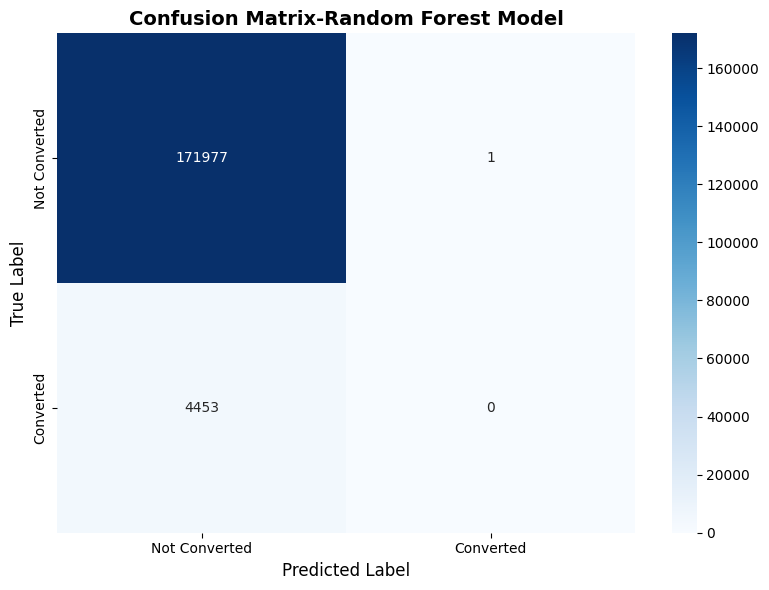

In [5]:
# Visualization 1 : Confusion matrix( Model)
print("\nGenerating Visualization 1 : Confusion Matrix...")

# Using model(Random Forest)
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix-Random Forest Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Confusion_matrix.png',dpi=300, bbox_inches='tight')
plt.show()


Generating Visualization 2: ROC Curve...


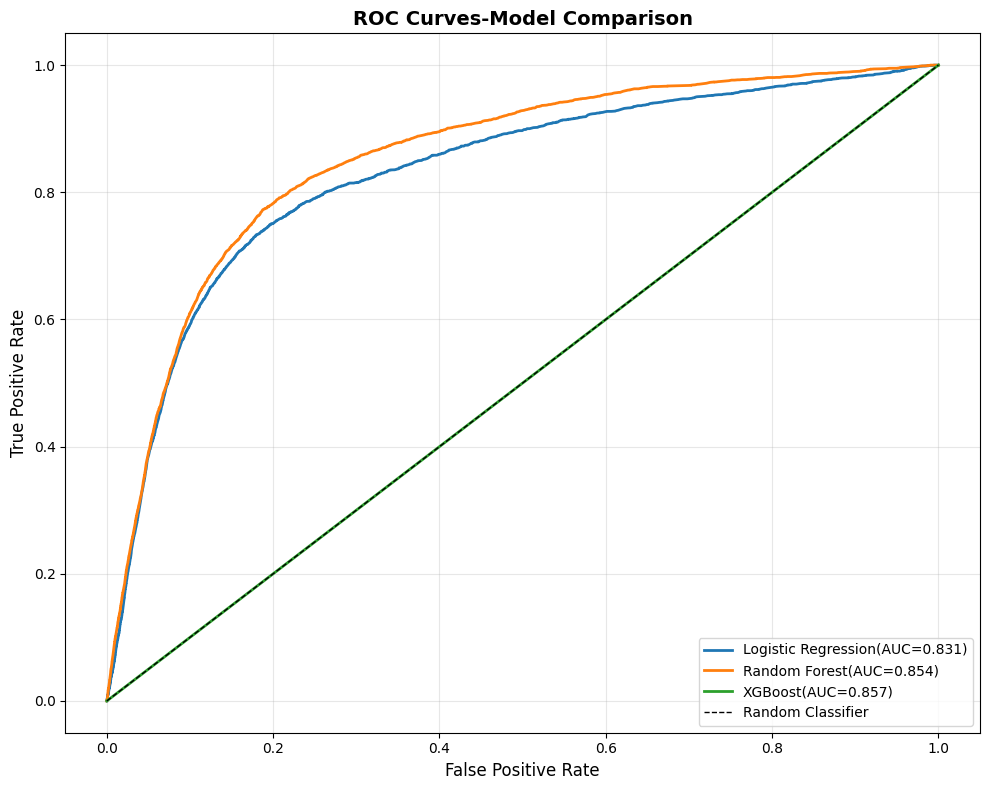

In [6]:
# Visualization 2: ROC Curves
print("\nGenerating Visualization 2: ROC Curve...")

# Calculate ROC curves
lr_fpr,lr_tpr,_ = roc_curve(y_test, lr_pred_proba)
rf_fpr , rf_tpr,_ = roc_curve(y_test, rf_pred_proba)
xgb_fpr, xgb_tpr ,_ = roc_curve(y_test, xgb_pred_proba)

plt.figure(figsize=(10,8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression(AUC={roc_auc_score(y_test, lr_pred_proba):.3f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest(AUC={roc_auc_score(y_test,rf_pred_proba):.3f})', linewidth=2)
plt.plot(xgb_fpr, xgb_fpr, label=f'XGBoost(AUC={roc_auc_score(y_test,xgb_pred_proba):.3f})', linewidth=2)
plt.plot([0, 1], [0,1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves-Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png',dpi=300, bbox_inches='tight')
plt.show()


Generating Visualization 3: Feature Importance...


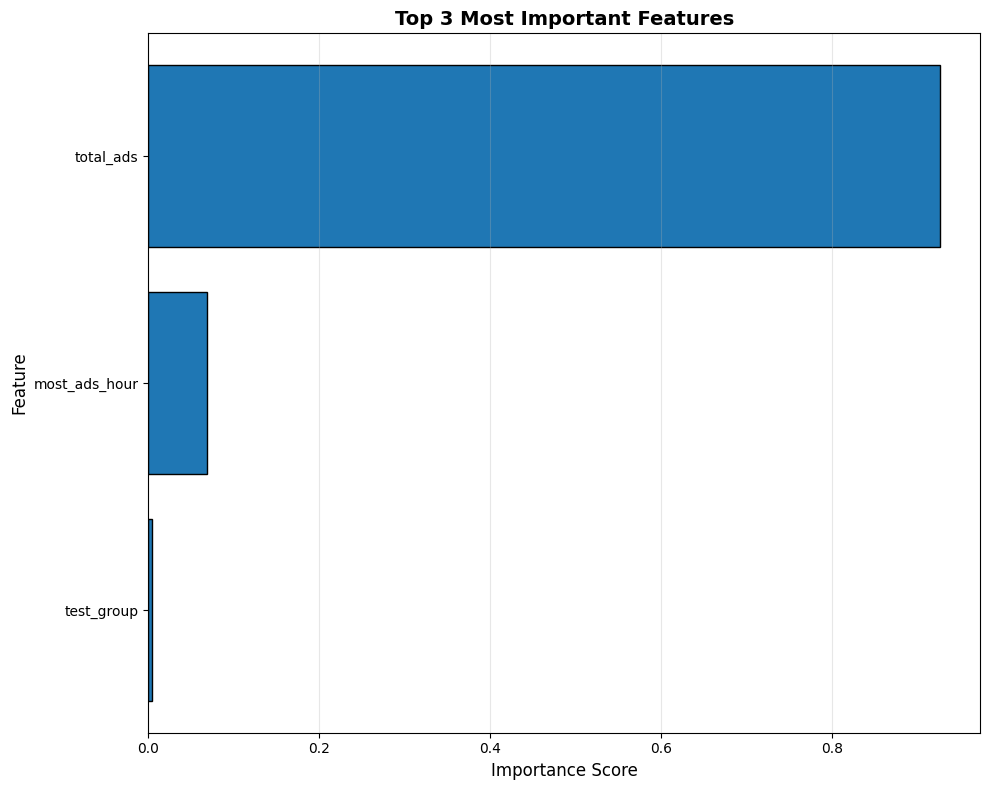

In [7]:
# Visualization 3: Feature importance
print("\nGenerating Visualization 3: Feature Importance...")

plt.figure(figsize=(10,8))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'], edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 3 Most Important Features', fontsize=14,fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png',dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# Export results

# model comparison
models_comparison.to_csv('models_comparison.csv', index=False)

# features importance
feature_importance.to_csv('Feature_importance.csv',index=False)